### Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the file

In [4]:
df = pd.read_csv('house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Basic Information  About the File**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


Data set has 21613 data points and 21 columns. There is only one nun-numeric feature which is date. We will convert date feature to datatime object

**Basic Statistics of the data set**

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**There is no missing values in the data set**

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

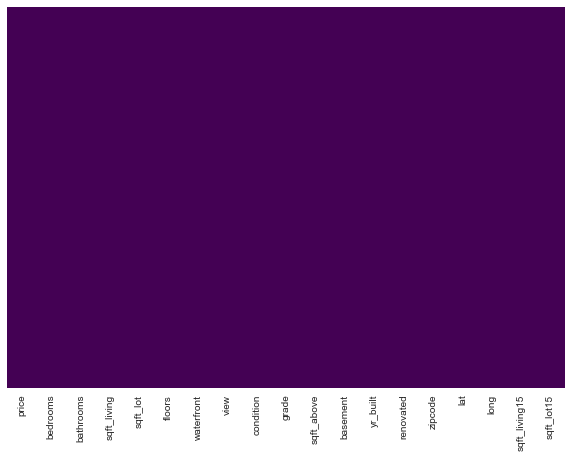

In [65]:
plt.figure(figsize = (10,7))
sns.set()
_ = sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

**Converting date feature to date time object**

In [9]:
df.date = df.date.astype(str).transform(lambda x: x.split('T')[0])
df.date =  pd.to_datetime(df.date)

**In yr_renovated feature, there are numerical and categorical values, in order to make all the values categorical we convert the numerical (renovation years ) to 1 as renovated.**

In [10]:
df.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

**Now we have 20699 non-renovated and 919 renovated house. We will apply a logistic regression model to predict whether a house is renovated or not.**

In [11]:
df.yr_renovated = df.yr_renovated.transform(lambda x: 1 if x > 0 else x)
df.yr_renovated.value_counts()

0    20699
1      914
Name: yr_renovated, dtype: int64

**Waterfront feature is also categorical as well**

In [12]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

**View feature is also categorical.**

In [13]:
df.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

**Bedrooms Feature**

In [14]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

**There are a few outliers in the bedrooms feature**

In [15]:
df[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


**Since there can not be 33 rooms in 1620 sqft house, we decided to drop this row.**

In [16]:
df = df.drop(df[df.bedrooms == 33].index)

**The other ourlier is the room number is 0**

**Instead of dropping these rows we decided to impute 0 bedrooms with most frequest one whic is 3.After imputing the feature we have 9837 houses which has 3 bedrooms as seen below.**

In [17]:
df.bedrooms = df.bedrooms.transform(lambda x: 3 if x == 0 else x)

In [18]:
df.bedrooms.value_counts()

3     9837
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

**We will convert the float price number to integer since there should not be decimal numbers of house pricing.**

In [19]:
df['price'] = df.price.astype(int)

**Sqft_basement fature contains categorical values, such as 0 and 1 and numerical values such as sqft of the basement. So we decided to convert this feature as categorical.In order to do that numerical values were changed as one which means that they have basements.**

In [20]:
df.sqft_basement.value_counts()

0       13126
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
840        85
580        84
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

**Now it has 12126 0(Negative) values and 8486 1(Positive) values.** 

In [21]:
df.sqft_basement = df.sqft_basement.transform(lambda x: 1 if x != 0 and x !=1 else x)
df.sqft_basement.value_counts()

0    13126
1     8486
Name: sqft_basement, dtype: int64

**We do not need the id feature and the listing date in the model thus we will drop id and data features.**

In [22]:
df.drop(['id','date'], axis = 1, inplace = True)

**We renamed the two columns since they contains categorical values.**

In [23]:
df = df.rename(columns={'yr_renovated': 'renovated', 'sqft_basement': 'basement'})

In [24]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1951,1,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
df.columns

Index([u'price', u'bedrooms', u'bathrooms', u'sqft_living', u'sqft_lot',
       u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'basement', u'yr_built', u'renovated', u'zipcode',
       u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 19 columns):
price            21612 non-null int32
bedrooms         21612 non-null int64
bathrooms        21612 non-null float64
sqft_living      21612 non-null int64
sqft_lot         21612 non-null int64
floors           21612 non-null float64
waterfront       21612 non-null int64
view             21612 non-null int64
condition        21612 non-null int64
grade            21612 non-null int64
sqft_above       21612 non-null int64
basement         21612 non-null int64
yr_built         21612 non-null int64
renovated        21612 non-null int64
zipcode          21612 non-null int64
lat              21612 non-null float64
long             21612 non-null float64
sqft_living15    21612 non-null int64
sqft_lot15       21612 non-null int64
dtypes: float64(4), int32(1), int64(14)
memory usage: 3.2 MB


**Now we have 21612 data points and 19 columns, it is time to save this cleaned data set as 'Cleaned_Austin_House_Price'.**

In [27]:
df.to_csv('Cleaned_Austin_House_Price.csv')